<a href="https://colab.research.google.com/github/Siraz116/Project-Outline/blob/patch-1/Datacom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter decimal data: 44
Data in binary format:  [0, 0, 1, 0, 1, 1, 0, 0]


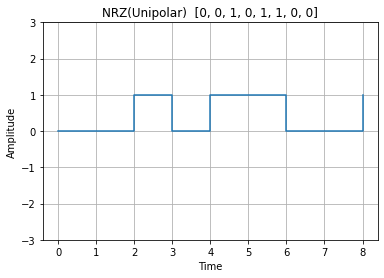

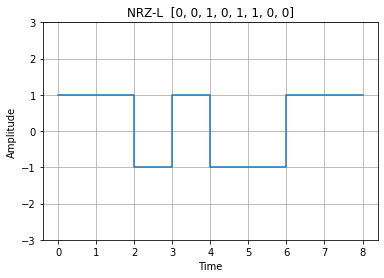

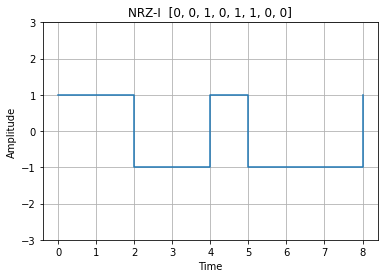

In [79]:



from operator import length_hint
import matplotlib.pyplot as plt
import numpy as np


def plot_NRZ(data):
    data_nrz = []
    for i in data:
        x = None
        if i==1:
            x= 1
        else:
            x=0
        data_nrz.append(x)
    data_nrz.append(1)
    xs = np.repeat(range(len(data_nrz)), 2)
    ys = np.repeat(data_nrz,2)
    xs = xs[1:]
    ys = ys[:-1]
    plt.grid()
    plt.title("NRZ(Unipolar)  " + str(data))
    plt.xlabel("Time" )
    plt.ylabel("Amplitude")
    plt.plot(xs,ys)
    plt.ylim(-3,3)
   
    plt.show()
#################################################
def plot_NRZ_L(data):
    data_nrz = []
    for i in data:
        x = None
        if i==1:
            x=-1
        else:
            x=1
        data_nrz.append(x)
    data_nrz.append(1)
    xs = np.repeat(range(len(data_nrz)), 2)
    ys = np.repeat(data_nrz,2)
    xs = xs[1:]
    ys = ys[:-1]
    plt.grid()
    plt.title("NRZ-L  " + str(data))
    plt.xlabel("Time" )
    plt.ylabel("Amplitude")
    plt.plot(xs,ys)
    plt.ylim(-3,3)

    plt.show()
#########################################
def plot_NRZ_I(data):
    data_nrz_i = []
    temp = True
    for i in range(len(data)):
        x = None
        if data[i]==1 and temp==True:
            x=-1
            temp = False
        elif data[i]==1 and temp==False:
            x=1
            temp = True
        elif data[i]==0 and temp==False:
            x=-1
        elif data[i]==0 and temp==True:
            x=1
        data_nrz_i.append(x)

    if data_nrz_i[0]==0:
        data_nrz_i[0] = 1
    data_nrz_i.append(1)
    xs = np.repeat(range(len(data_nrz_i)), 2)
    ys = np.repeat(data_nrz_i,2)
    xs = xs[1:]
    ys = ys[:-1]
    plt.grid()
    plt.title("NRZ-I  " + str(data))
    plt.xlabel("Time" )
    plt.ylabel("Amplitude")
    plt.plot(xs,ys)
    plt.ylim(-3,3)
#    plt.xlim(0,9)
    plt.show()




#@@@@@@@@@@@@@@@@@@@@ function call @@@@@@@@@@@@@@@@@@@@@@@@@@@@@


dec = input("Enter decimal data: ")
dec = bin(int(dec))
bin_data = str(dec).replace('0b', '')
data = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(bin_data)):
    data[8 - len(bin_data) + i] = int(bin_data[i])
print("Data in binary format: ",data)
plot_NRZ(data)
plot_NRZ_L(data)
plot_NRZ_I(data)



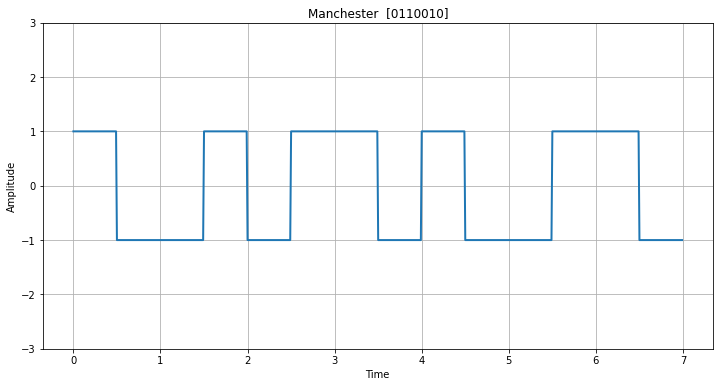

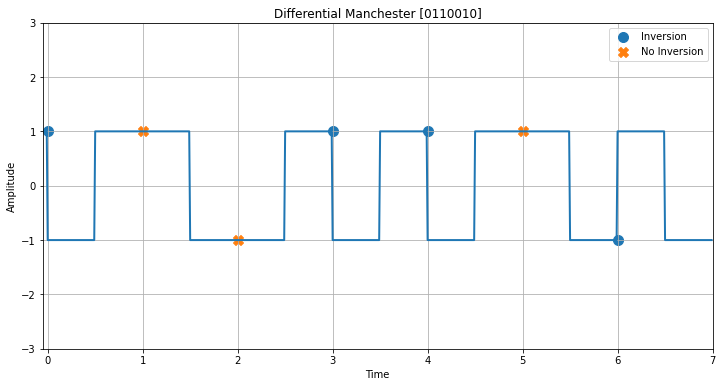

In [80]:
import numpy as np
import matplotlib.pyplot as plt

#################################################
def plotManchester(data):
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)
    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
        elif bit=='1':
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Manchester  [' + data +']')
    plt.ylim(-3,3)
 #   plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.show()


########################################################

def plotDifferentialManchester(data):
    x=np.arange(-1, len(data), 0.01)
    y=np.empty(0)
    inversion_x=[]
    inversion_y=[]
    no_inversion_x=[]
    no_inversion_y=[]
    #adding a previous state
    y=np.concatenate((y, np.ones(50)*(-1)))
    y=np.concatenate((y, np.ones(50)*(1)))
    prev_state = 1
    i = -1
    for bit in data:
        i+=1
        if bit=='0' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            inversion_x.append(i)
            inversion_y.append(-1)
        elif bit=='0' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            inversion_x.append(i)
            inversion_y.append(1)
        elif bit=='1' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            prev_state=1
            no_inversion_x.append(i)
            no_inversion_y.append(-1)
        elif bit=='1' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            no_inversion_x.append(i)
            no_inversion_y.append(1)
            prev_state=-1
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    p1=plt.scatter(inversion_x, inversion_y, marker="o", s=10**2)
    p2=plt.scatter(no_inversion_x, no_inversion_y, marker="X", s=10**2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Differential Manchester ['+data + ']')
    plt.xlim([-.05,len(data)])
    plt.ylim(-3,3)
#    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.legend([p1,p2],["Inversion","No Inversion"])
    plt.show()


#@@@@@@@@@@@@@@@@@@@@ function call @@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# For Taking Data Manually
# data=input("Input Binary Data Stream : ")
data = "0110010"
plotManchester(data)
plotDifferentialManchester(data)